# Python Group
## Wali Chaudhary, Bryce Shurts, & Alex Wright

## 1. Business Understanding

The Hotels Reservation dataset was uploaded by Ahsan Raza on kaggle in an effort to discover patterns in online-booking tendencies of hotel customers. Specifically, if a customer would honor the reservation or if they would eventually cancel it. The data was collected from a single country which cannot be disclosed for privacy reasons as stated by Ahsan in the Kaggle discussion posts.

The datasets description states there have been major issues in the hotel industry in regard to consumer online booking activity. The convenience and low to little cost of cancelling an online-booking has led to a significant change in consumer behavior. There are a larger number of cancellations and rescheduling due to changes of plans, scheduling conflicts, and other unforeseen circumstances. Ahsan describes this convenient cancellation feature as beneficial to hotel guests, but less desirable and possible revenue diminishing for hotels.

One can use this dataset to predict if a consumer will honor their reservation or not. Parties that may be interested in the classification result may be those employed in Hotel Management, or management from any industry that deals with an online reservation system such as restaurants, resorts, or motels. A hotel manager will be able to gain insight as to why certain customers may be more prone to online cancelling and may make better estimations regarding hotel occupancy.

### Citation & Acknowledgement
The Hotels Reservation dataset is liscenced under the [Attribution 4.0 International CC license](https://creativecommons.org/licenses/by/4.0/) and was provided by Ahsan Raza on [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset). The dataset has been modified through the removal of columns in the pursuit of analyzing the data with regard to perdicting whether or not a given booking with be honored. 

Antonio, N., de Almeida, A., & Nunes, L. (2019). Hotel booking demand datasets. *Data in Brief, 22*, 41–49.
https://doi.org/10.1016/j.dib.2018.11.126 

### 1.1 Measure of Success

So, what defines a successful machine learning algorithm?
Due to the non-critical nature of hotel cancellations, it is safe to assume that a good model should be able to predict more accurately than random occurrence (50/50). For a business with a more aggressive strategy to produce profit, baseline of 80% for the classification rate may be ideal.


## 2. Data Understanding

The dataset contains 19 features, 12 numerical (quantitative) and 7 categorical (qualitative), which can be broken down as such:

- Booking_ID: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
- no_of_adults: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_children: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_weekend_nights: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_week_nights: Quantitative, continuous, & ratio feature; integer repersentation
- type_of_meal_plan: Qualitative, discrete, & ordinal feature; integer repersentation
- required_car_parking_space: Qualitative, discrete, & nominal feature; binary repersentation
- room_type_reserved: Qualitative, discrete, & ordinal feature; integer repersentation
- lead_time: Quantitative, continuous, & ratio feature; integer repersentation
- arrival_year: Quantitative, discrete, & ordinal feature; integer repersentation
- arrival_month: Quantitative, discrete, & ordinal feature; integer repersentation
- arrival_date: Quantitative, discrete, & ordinal feature; integer repersentation
- market_segment_type: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
- repeated_guest: Qualitative, discrete, & nominal feature; binary repersentation
- no_of_previous_cancellations: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_previous_bookings_not_canceled: Quantitative, continuous, & ratio feature; integer repersentation
- avg_price_per_room: Quantitative, continuous, & ratio feature; float repersentation
- no_of_special_requests: Quantitative, continuous, & ratio feature; integer repersentation
- booking_status: Qualitative, discrete, & nominal feature; binary repersentation

This gives us a good spread of data to work with, although the need to one-hot encode so many features is likely going to result in our dimensionality doubling and creating a degree of multicollinearity that could very well prove to be unacceptable: to combat this we will need to employ methods such as dummy encoding, correlation analyses, random forest regressions, PCA, and UMAP to weed out the features not important for identifying the target feature of booking_status. Additionally, we will need to take care in applying the appropriate methods onto any given feature: not all correlations are built the same and nor do PCA and UMAP act as a magic bullet for feature reduction. Rather, we will need to make a considered effort to accurately define relationships between the features and optimize our algorithms' hyperparameters to set any future classification up for success.

<sub> Plain english feature definitions can be sourced from the original dataset's listing at https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset in the Details section </sub>

In [64]:
import pandas as pd
import numpy as np

# Typings
from pandas import ( DataFrame, Series )
from numpy import ndarray

df: DataFrame = pd.read_csv("Hotel Reservations.csv")

### 2.1 Data Description

In [65]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [66]:
# Define data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Get some statistics about the data set

In [67]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 2.2 Data Quality

After analyzing the data in the following graphs, we find that there is no missing data and that nothing will need to be imputed into our dataset.

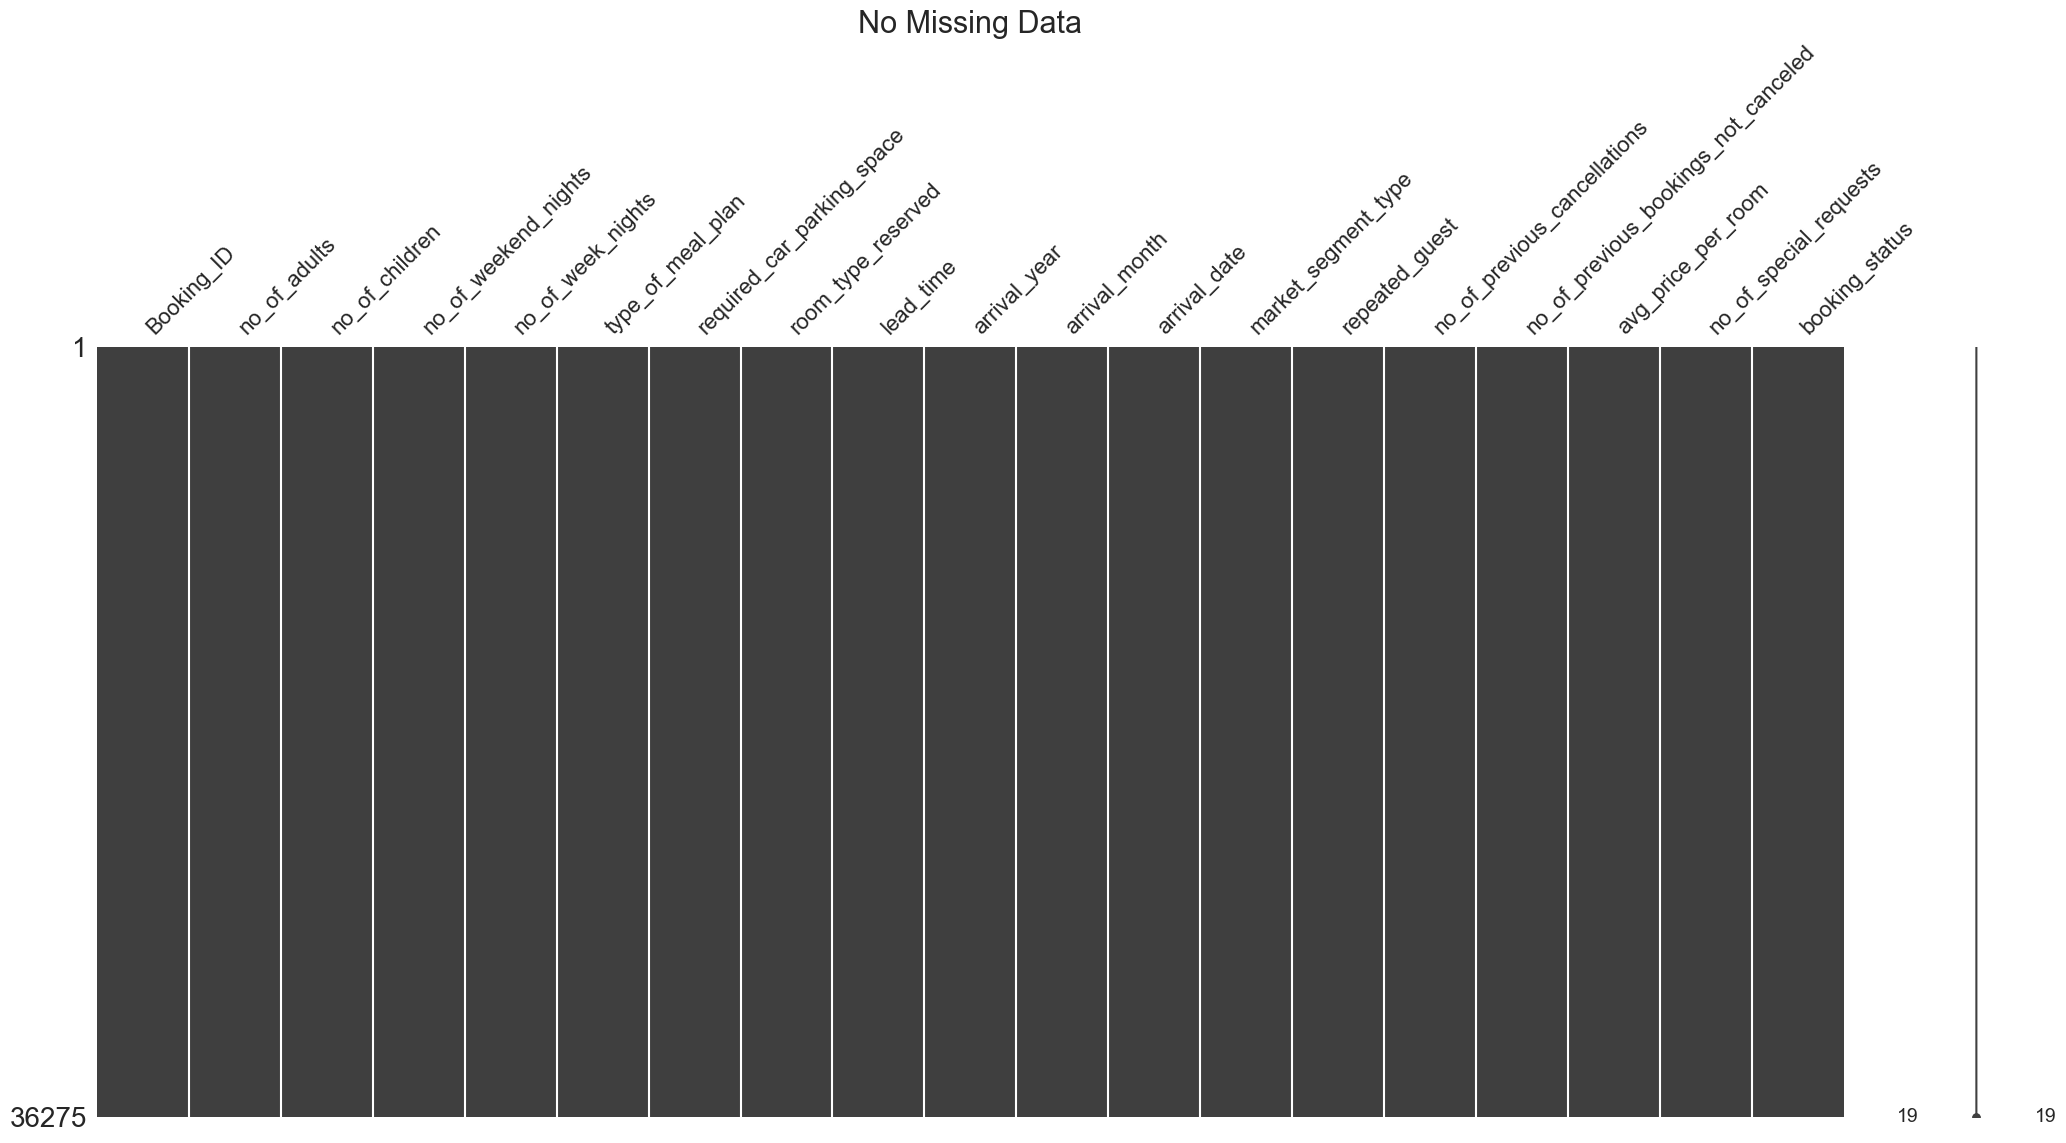

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import missingno as mn

df = pd.read_csv("Hotel Reservations.csv")
mn.matrix(df)
plt.title("No Missing Data", fontsize=22)
plt.show()


In [69]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Verify Data Quality

#### Duplicate entries
The dataset labels each entry with a unique ID that is associated with a booking entry by INNHotels, the hotel chain the data was sourced from. As such, we can be confident that the dataset does not contain any duplicate entries, vis-à-vis multiple entries repersenting the same booking.

#### Other invalid data
While duplicates may not be a chief concern, there is still the need to consider whether or not the data present in the dataset is entirely valid. For this purpose, we can do some basic sanity checking of the data:

In [70]:
# List all arrival years; any before 2017 or after 2018 would be invalid:
print("Invalid data from before 2017: " + str(df["arrival_year"].lt(2017).any()))
print("Invalid data from after 2018:  " + str(df["arrival_year"].gt(2018).any()))

# Rename columns to match expected values of to_datetime() function
df.rename(columns= {"arrival_year": "year", "arrival_month": "month", "arrival_date": "day"}, inplace=True)

# Check for any dates that are invalid for the month
# In place to avoid needing to make too many new dataframes
# TODO: avoid making temporary list
temp = pd.to_datetime(df[["year", "month", "day"]], errors = "coerce")
print("Invalid dates exist:           " + str(temp.isnull().any())) # True means there are invalid dates somewhere
df.drop(axis=1, index=temp[temp.isnull()].index, inplace=True)

Invalid data from before 2017: False
Invalid data from after 2018:  False
Invalid dates exist:           True


#### Formatting data for machine learning

Because the Booking_ID column is different for every single row, it is likely to not have statistical significance as there are no relationships to it besides only from the row it's associated with. We can go ahead and drop it.

In [71]:
df.drop('Booking_ID', axis=1, inplace=True)

In [72]:
df['market_segment_type'].value_counts()

Online           23194
Offline          10518
Corporate         2011
Complementary      390
Aviation           125
Name: market_segment_type, dtype: int64

We see that Online reservations have a high cancellation rate, while corporate and complementary reservations see low cancellation rates

Some graphs from:
https://www.kaggle.com/code/effortno11/beginner-friendly-eda-model-comparison#Data-Analysis

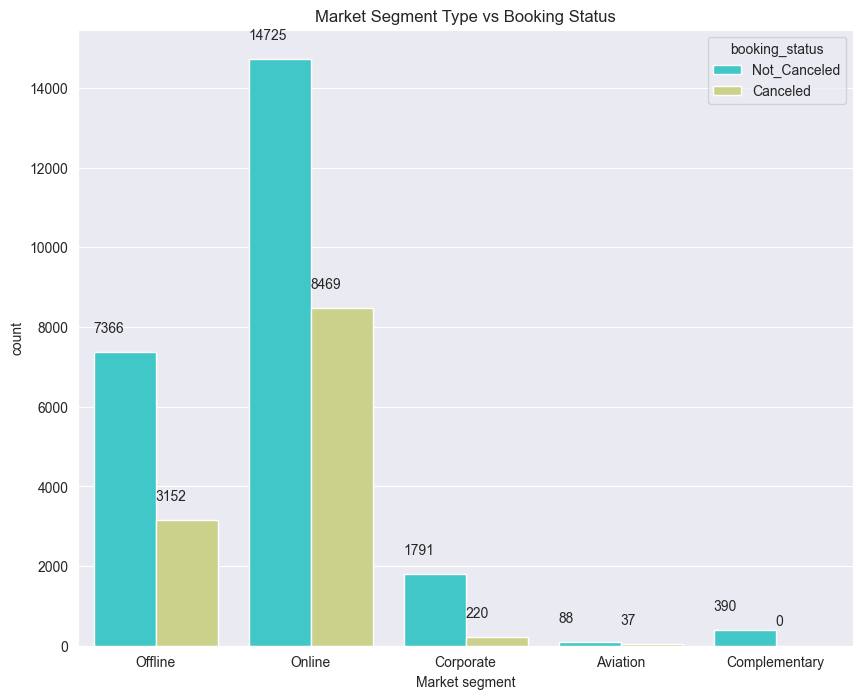

In [73]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

ax = sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette='rainbow')
plt.title('Market Segment Type vs Booking Status')
plt.xlabel('Market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+500))
plt.show()

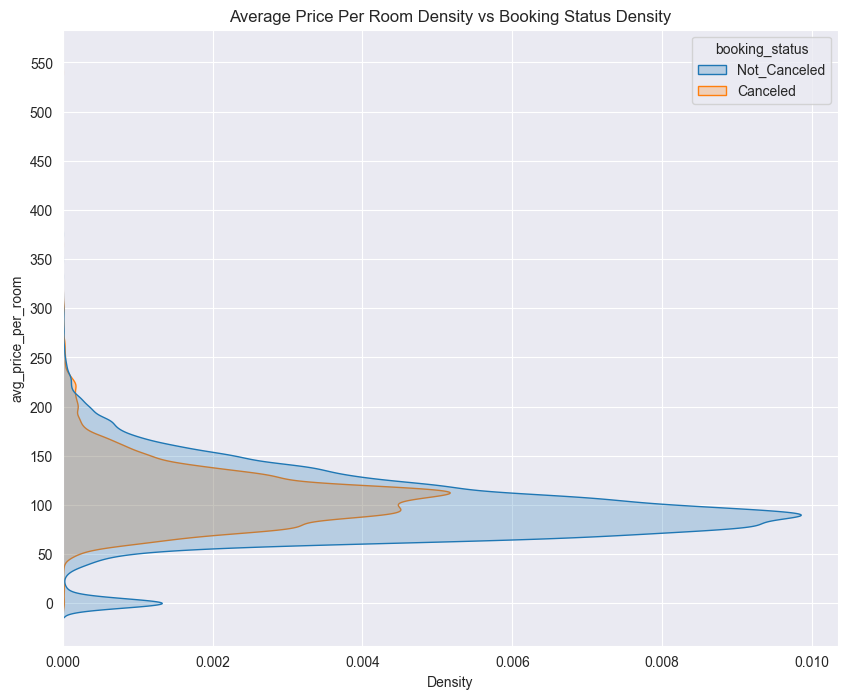

In [74]:
plt.figure(figsize=(10,8))
x=sns.kdeplot(data=df,y='avg_price_per_room',hue='booking_status',fill=True,gridsize=1000)
x.set_yticks(range(0,600,50))
x.set_title("Average Price Per Room Density vs Booking Status Density")
plt.show()

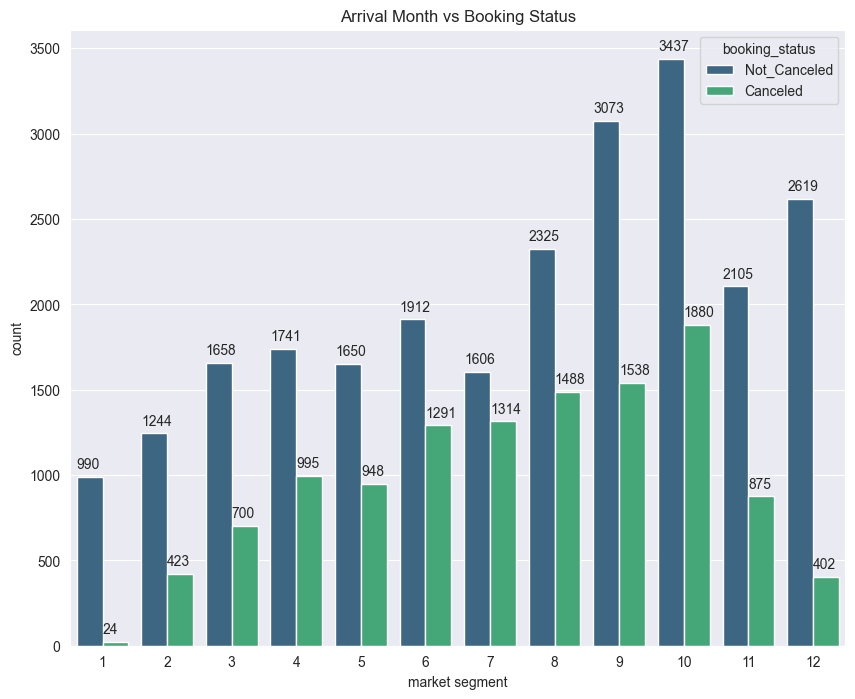

In [75]:
# on the basis of arrival_month 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='month',hue='booking_status',palette='viridis')
plt.title('Arrival Month vs Booking Status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))

In [76]:
# Encode class labels

# Find the unique class label values (should be 'Canceled' and
# 'Not Canceled'), and transform the dataframe to include those
bk_status_mapping = {
    label: idx for idx, label in enumerate(np.unique(df.booking_status))
}
df.booking_status: Series = df.booking_status.map(bk_status_mapping)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


Now lets dummy-encode any ordinal categorical features such as
type_of_meal_plan, room_type_reserved, arrival_year, market_segment_type.

Dummy Encoding is an additional step in one-hot encoding in which we can drop the amount of columns produced from one-hot encoding from k to k-1 columns. This is usually done by dropping the first column in each produced set. This is to prevent a degree of multi-collinearity as the dropped column's value can be inferred from the absence any selected values in the other columns

In [77]:
df = pd.concat([df, pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])], axis=1)
df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1, inplace=True)

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,year,month,day,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


 1) lead_time                      0.312316
 2) avg_price_per_room             0.153313
 3) no_of_special_requests         0.111754
 4) day                            0.094021
 5) month                          0.083284
 6) no_of_week_nights              0.053106
 7) no_of_weekend_nights           0.037320
 8) market_segment_type_Online     0.027085
 9) year                           0.026375
10) no_of_adults                   0.023528
11) market_segment_type_Offline    0.014302
12) type_of_meal_plan_Meal Plan 2  0.008816
13) type_of_meal_plan_Meal Plan 1  0.007286
14) no_of_children                 0.007090
15) required_car_parking_space     0.006673
16) room_type_reserved_Room_Type 1 0.006122
17) room_type_reserved_Room_Type 4 0.005599
18) market_segment_type_Corporate  0.005484
19) type_of_meal_plan_Not Selected 0.005433
20) repeated_guest                 0.002232
21) room_type_reserved_Room_Type 2 0.002047
22) room_type_reserved_Room_Type 5 0.001771
23) no_of_previous_bookings_not_

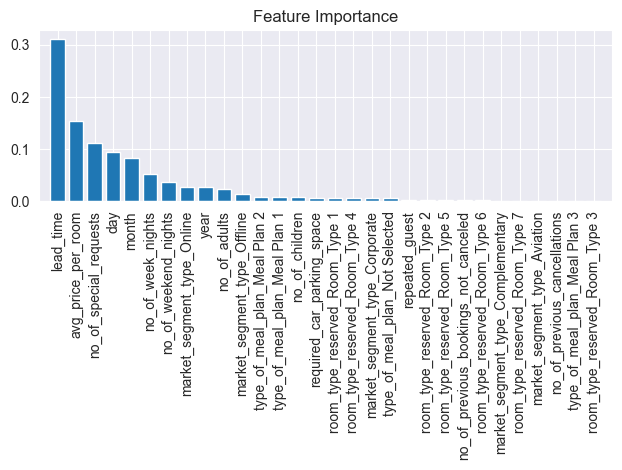

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop("booking_status", axis=1)
y = df["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
feature_labels: DataFrame = X_train.columns[0:]
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
importance_info = pd.Series(forest.feature_importances_, index=X.columns)
indices = np.argsort(importance_info)[::-1]

val = X_train.shape[1]
# Looping over # of features
for f in range(val):
    feat_idx = indices[f]
    feature_label = feature_labels[feat_idx]
    i_info = importance_info[feat_idx]
    print("%2d) %-*s %f" % (f + 1, 30, feature_label, i_info))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance_info[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [79]:
print(df.dtypes)
print('========')
print(df.info())

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
year                                      int64
month                                     int64
day                                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1             uint8
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 1            uint8
room_type_reserved_Room_Type 2          

## 3. Data visualization

Now, let's continue on to visualize our data. The goal is to understand the following:

1) Which features are most important?
2) Which features are least important?
3) Is there a degree of relation between of each of the features? If so, what is the magnitude of that relation?

### Finding the most relevant features via Random Forest

Let's start off with finding out our most important features. One way to do that before moving to a PCA analysis is to apply the Random Forest algorithm, and training a model to find out the most relevant features.

We do not need to apply any feature scaling here because the Random Forest is based on many Decision Trees, and Decision Tree model doesn't marry the distances between two features. Rather, the split points of each tree are determined based on the decrease in impurity (a measurement of disorder, or randomness in the data) as the goal of a Decision Tree is to split the data into homogenous subsets end up with nodes that have more homogenous class distributions.

We can see that on the y-axis we have the relative feature importance, and on the x-axis we have each predictor variable.

The 3 most contributing features to the target variable, "booking_status", are the lead time, average price per room, and the number of special requests.

The 3 least contributing features would be the types of meal plan, room type reserved, and the number of previous cancellations.

To make further sense of this, let's now analyze the following questions based on the relevant features we found:

   1) What is the average duration of lead times that lead to the most cancellations?
   2) Is there a relationship between lead time and the average price per room for cancelled bookings?
   3) Can we identify a pattern in the combination of lead time, average price per room, and number of special requests for cancelled bookings?

#### 1) What is the average duration of lead times that leads to the most cancellations?

This is an important question because the observer may be interested in knowing how likely a customer that reserves closer or further to the start date will cancel. Ofcourse, this relationship is not the tell-all be-all, as we are only measuring the relationship between 2 features. However, it provides a solid foundation for us to begin branching out and understanding relationships between other highly relevant features to the booking status.

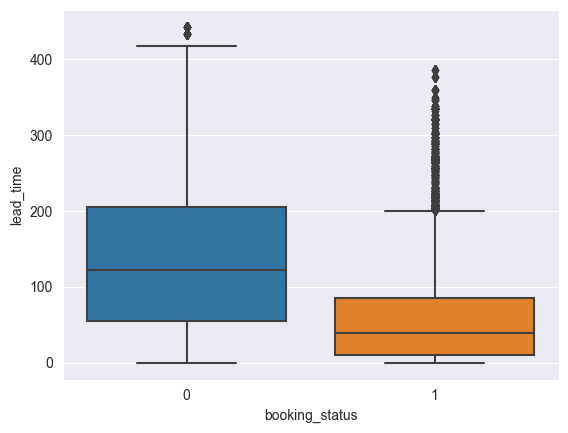



The average lead time for cancelled bookings is 139.27 days
The average lead time for fulfilled bookings is 58.95 days




In [80]:
import matplotlib.pyplot as plt

# Subset the data to only include rows where booking_status is "Cancelled"
cancelled_bookings = df[df["booking_status"] == 0]
fulfilled_bookings = df[df["booking_status"] == 1]

# Calculate the average lead time for cancelled bookings
cancelled_avg_lead_time = round(cancelled_bookings["lead_time"].mean(), 2)
fulfilled_avg_lead_time = round(fulfilled_bookings["lead_time"].mean(), 2)

sns.boxplot(x=y, y=X["lead_time"])
plt.show()

print("\n")
print(f"The average lead time for cancelled bookings is {cancelled_avg_lead_time} days")
print(f"The average lead time for fulfilled bookings is {fulfilled_avg_lead_time} days")
print("\n")


Great, so from the boxplot and the average measurement of the lead times for both cancelled and fulfilled bookings, we can tell cancelled bookings generally have a higher lead time than fulfilled bookings, by a rather significant margin. The average lead time is 2.36x higher for cancelled reservations (139.27 days) than their fulfilled counterparts (58.95 days). 

Now that we have established a general relationship, let's fine tune a bit further by examining the Interquartile ranges. This will help us get a more granular view of the data and provide more focused view of its central tendency while refraining from tracking outliers.

In [81]:
iqr_cancelled = cancelled_bookings['lead_time'].quantile(0.75) - cancelled_bookings['lead_time'].quantile(0.25)
iqr_fulfilled = fulfilled_bookings['lead_time'].quantile(0.75) - fulfilled_bookings['lead_time'].quantile(0.25)

print("\n")
print(f"IQR for cancelled bookings lead time: {iqr_cancelled}")
print(f"IQR for fulfilled bookings lead time: {iqr_fulfilled}")
print("\n")



IQR for cancelled bookings lead time: 150.0
IQR for fulfilled bookings lead time: 76.0




From the IQR ranges, we can tell that the central part of the data still maintains a strong correlation with the data we gathered from calculating the average lead times for booking status. The IQR for the lead time of cancelled bookings is 1.97x the IQR of those for fulfilled bookings. 

The average takes into account outliers as it provides a view of the entire dataset, rather than the focused view of the IQR on the central 50% of the data. 

Because of how similar the values calculated by both statistics are, we can conclude that there are little outliers in the analyzed data because the general relationship of cancelled bookings lead times being roughly ~2x those of fulfilled bookings is maintained by both the Average and IQR statistics.

#### 2) Is there a relationship between lead time and the average price per room for cancelled bookings?

The reason we may want to explore this is to see if there is a relationship between the pricing of a cancelled booking and how long a customer may have waited before the initial reservation. 

Generally, one would assume reservations made closer to the start of the reservation will be priced higher across the hotel industry due to supply and demand. The demand would be higher closer to the reservation time, and the supply would be lower as there would generally be less rooms available at the current time and booking further in advance.

There are 2 purposes for us analyzing the relationship between the lead time and average price per room for cancelled reservations. First, it will allow us to verify the general assumption that those who book closer to the start date will generally have higher priced rooms. Second, this will inform the observer as to how willing a customer would be to cancel a reservation if it's closer or further to the reservation start time, and with the given price associated with that lead time. This is important information because the observer can act on any findings to reduce price for those likely to cancel given a certain lead time, or other measures to protect business.

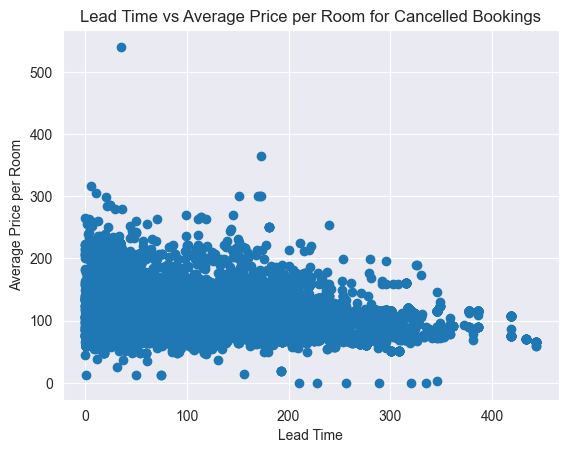

In [82]:
# Subset the data to only include rows where booking_status is "Cancelled", or 0
cancelled_bookings = df[df["booking_status"] == 0]

# Plot the relationship between lead_time and avg_price_per_room for cancelled bookings
plt.scatter(cancelled_bookings["lead_time"], cancelled_bookings["avg_price_per_room"])
plt.xlabel("Lead Time")
plt.ylabel("Average Price per Room")
plt.title("Lead Time vs Average Price per Room for Cancelled Bookings")
plt.show()

From the scatter plot, we can see a slight negative correlation between the average price per room, and the lead time. However, it's hard to infer other important characteristics; such as if the negative correlation is statistically significant, or if the average price per room is a good predictor for lead time. 

A Least Squares Regression may be helpful here, as it is a good statistical measure for how significant the relationship between 2 independent variables are. An Ordinary Least Squares Regression is type of Least Squares Regression that will additionally will estimate the paramters that will best fit the data for us. Let's run a Ordindary Least Squares Regression to collect some more data.

In [83]:
import statsmodels.api as sm

## Subset the data to only include rows where booking_status is "Cancelled" (0)
# cancelled_bookings = df[df["booking_status"] == 0]

X = cancelled_bookings["lead_time"].values
X = sm.add_constant(X)
y = cancelled_bookings["avg_price_per_room"].values
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     523.7
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.81e-113
Time:                        21:12:27   Log-Likelihood:                -57861.
No. Observations:               11878   AIC:                         1.157e+05
Df Residuals:                   11876   BIC:                         1.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.9401      0.500    239.775      0.0

We can use a couple measurements given by the Ordinary Least Squares regression output to better our understanding. 

In this scenario the dependent variable is the average price per room, and the independent variable is the lead time. The model tells us that the lead time has a significant negative correlation with the average price per room. This is explained by the p-value being less than .005, with a coefficient of -0.067. This means that the longer the lead time, the lower the average price per room will be.

The R-squared value (.042), tells us that the lead time explains only 4.2% of the variance in the average price per room. This means that the lead time is not a strong predictor of the average price per room.

Interestingly, the F-statistic is quite large so there definitely does exist a strong statistical relationship and the lead time does have a measurable impact on the average price per room.

However, the low R-Squared value tells us that even though there does exist a strong measurable impact via the high F-statistic, there is only a small proportion of the variation in the average price per room that can be explained by the lead time, and the majority of the variation (95.8%) is told by other factors. 

Therefore, it can be said that even though the lead time is statistically significant, it is not a good predictor of the average price per room.

#### 3) Can we identify a pattern in the combination of lead time, average price per room, and number of special requests for cancelled bookings?

This is an interesting question as we are taking multivariate data into account, and this question is exploratory in nature. This questions builds upon the previous ones as we are now adding a variable for special requests, and we are trying to find relationships between the 4 of those features rather than specifically targeting a certain relationship.

From the last question, we found that cancelled bookings with less lead time tended to pay higher prices per room. With this question, we will now understand how cancelled reservations with certain lead times & prices per room may be influenced by the number of special requests.

This is important to answer because we will then potentially be able to further subdivide the customers willing to cancel versus those who do not. From a hotel managers perspective, it may be of interest because they will better understand how the frequency of special requests can build upon our previous findings about the relationship between lead time and prices per room. 

"Do customers who cancelled with less lead time and higher room prices tend to order more special requests?"

These kinds of questions will be better understood with our findings. Let's first start off with some visualization.


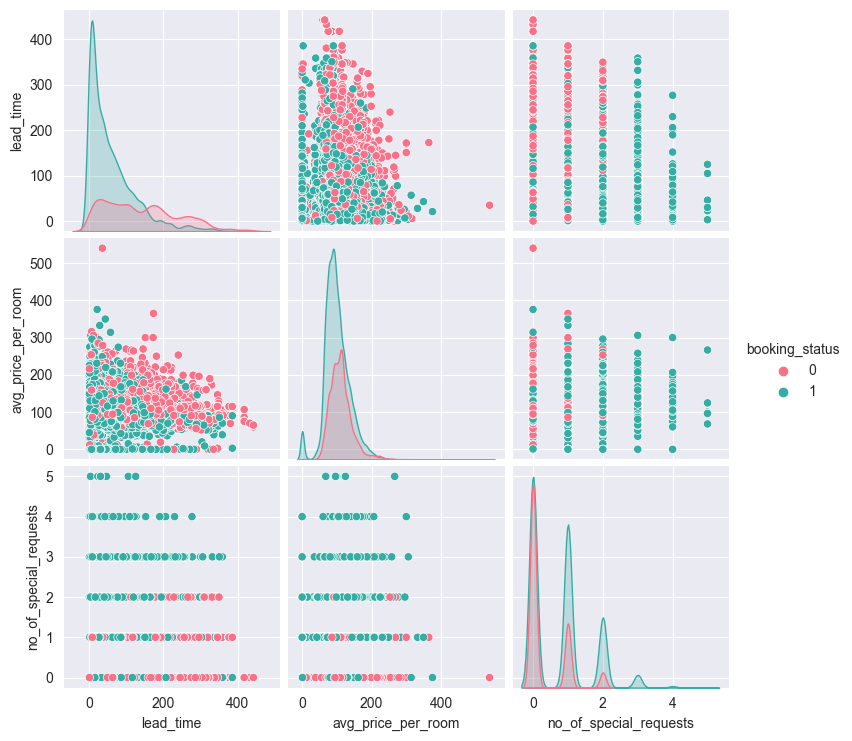

In [85]:
# subset = cancelled_bookings[['lead_time', 'avg_price_per_room', 'no_of_special_requests']]
subset = df[['booking_status','lead_time', 'avg_price_per_room', 'no_of_special_requests']]
subset.describe()
subset.corr()
sns.pairplot(subset, hue="booking_status", palette="husl")
plt.show()

From the pairwise plot, we can get a good exploratory view of the relationships between lead_time, no_of_special_requests, avg_price_per_room and booking_status with booking_status being differentiated with 0 (Cancelled) bookings being red, and 1 (Not Cancelled or Fulfilled) bookings being green.

Let's start by examining the relationship between the booking status and number of special requests by looking at the kernel density graph on the bottom right. We can see the there are high preaks at and for 0 & 1 special requests for cancelled reservations, with the highest being at 0 and the peak at 1 being significant but still less than the peak for fulfilled. From 1-4 special requests, we can see the fulfilled reservations have significantly higher peaks than those who cancelled. From this kernel density graph, we can tell there's a much higher frequency of special requests from those fulfilled bookings than those cancelled.

If we look at the bottom left or top right scatterplot for no_of_special_requests and lead_time with a colored booking_status, we can see that bookings with less lead time tended to have more special requests, and those bookings also tended to be fulfilled rather than cancelled ones. This makes sense as that builds upon our previous observation that fulfilled bookings tend to have more special requests. 
This is also interesting as it builds on our findings in question 1 that smaller lead times tend to have fulfill their bookings.

The scatterplot for special requests and the average price per room doesn't seem to have strong visual significance. 

In summary, we can see that special request frequencies tend to be higher in fulfilled bookings, and that lower special request frequencies tend to have higher lead times and higher booking cancellations.


A majority of bookings originate from online bookings, and online bookings also account for a majority of the cancellations in number. Percentage wise corporate bookings are the least reliable, but are relatively small in comparison. There is not a strong connection between the cost of the room and the rate of cancellations. The most business comes in during the late summer and fall, which likely corresponds with favorable weather, but there is relatively similar cancellation rates throughout the year with an exception for January and December which saw large deltas percentage wise.


#### Correlation between different columns

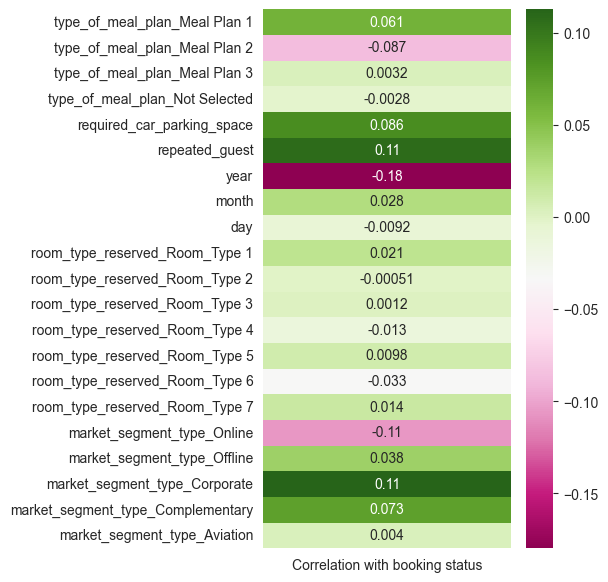

In [86]:
discrete_corr = df[[
    "type_of_meal_plan_Meal Plan 1",
    "type_of_meal_plan_Meal Plan 2", 
    "type_of_meal_plan_Meal Plan 3", 
    "type_of_meal_plan_Not Selected", 
    "required_car_parking_space", 
    "repeated_guest", 
    "year",
    "month", 
    "day",
    "room_type_reserved_Room_Type 1",
    "room_type_reserved_Room_Type 2",
    "room_type_reserved_Room_Type 3",
    "room_type_reserved_Room_Type 4",
    "room_type_reserved_Room_Type 5",
    "room_type_reserved_Room_Type 6",
    "room_type_reserved_Room_Type 7",
    "market_segment_type_Online", 
    "market_segment_type_Offline", 
    "market_segment_type_Corporate", 
    "market_segment_type_Complementary",
    "market_segment_type_Aviation"
]]
discrete_corr = discrete_corr.corrwith(df["booking_status"], method="kendall", numeric_only=True)
plt.figure(figsize=(4,7))
sns.heatmap(discrete_corr.to_frame("Correlation with booking status"), annot=True, cmap='PiYG')
plt.show()

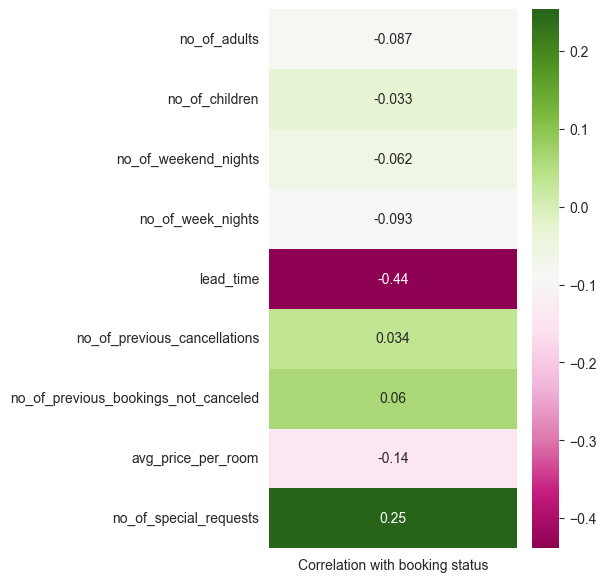

In [87]:
continuous_corr = df[[
    "no_of_adults", 
    "no_of_children", 
    "no_of_weekend_nights", 
    "no_of_week_nights", 
    "lead_time", 
    "no_of_previous_cancellations", 
    "no_of_previous_bookings_not_canceled", 
    "avg_price_per_room", 
    "no_of_special_requests"]]
continuous_corr = continuous_corr.corrwith(df["booking_status"], method="pearson", numeric_only=True)
plt.figure(figsize=(4,7))
sns.heatmap(continuous_corr.to_frame("Correlation with booking status"), annot=True, cmap='PiYG')
plt.show()

In [88]:
df.drop([
    'type_of_meal_plan_Not Selected',
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 2',
    'type_of_meal_plan_Meal Plan 3',
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 2',
    'room_type_reserved_Room_Type 3',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5',
    'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7',
    'month',
    'day',
    'required_car_parking_space',
    'market_segment_type_Aviation',
    'market_segment_type_Offline',
    'market_segment_type_Complementary',
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights', 
    'no_of_week_nights', 
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled'], axis=1, inplace=True)

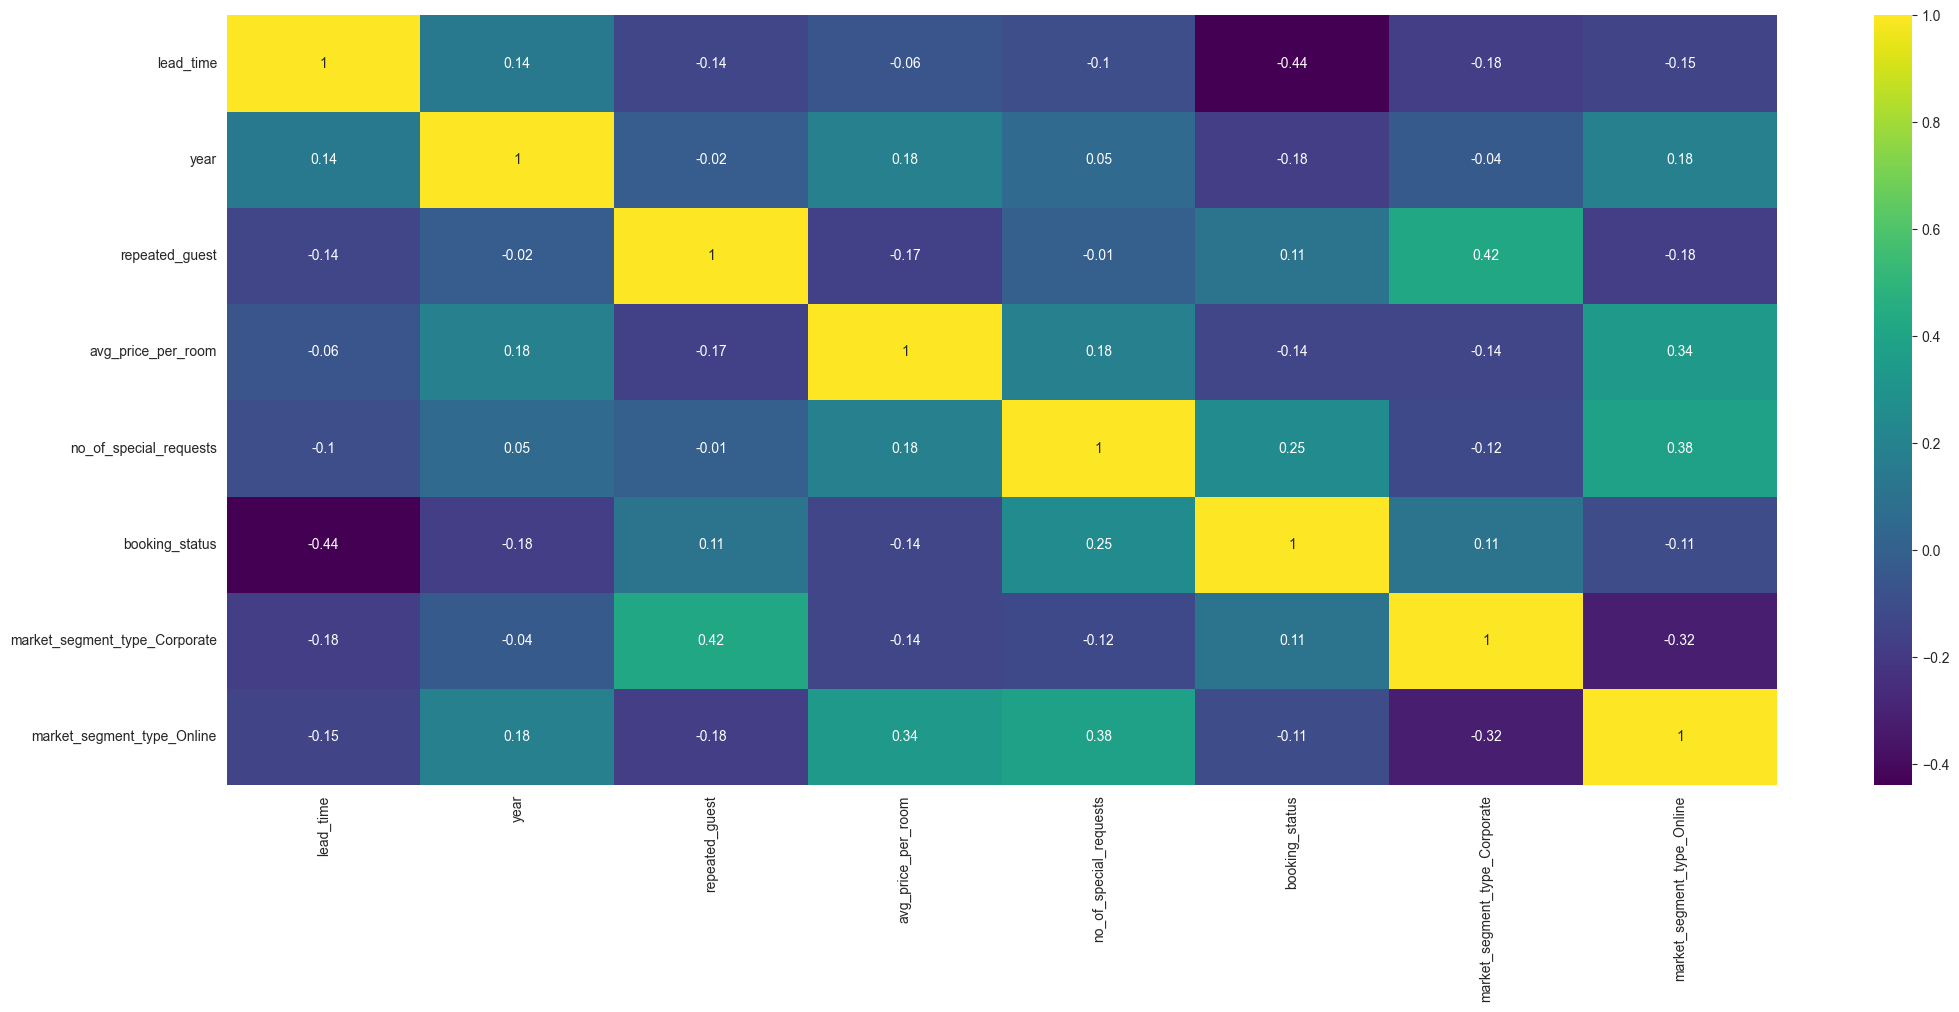

In [89]:
correlation = df.corr().round(2)
plt.figure(figsize = (25,10))
sns.heatmap(correlation, annot = True, cmap = 'viridis')
plt.show()

#### Correlation with booking status

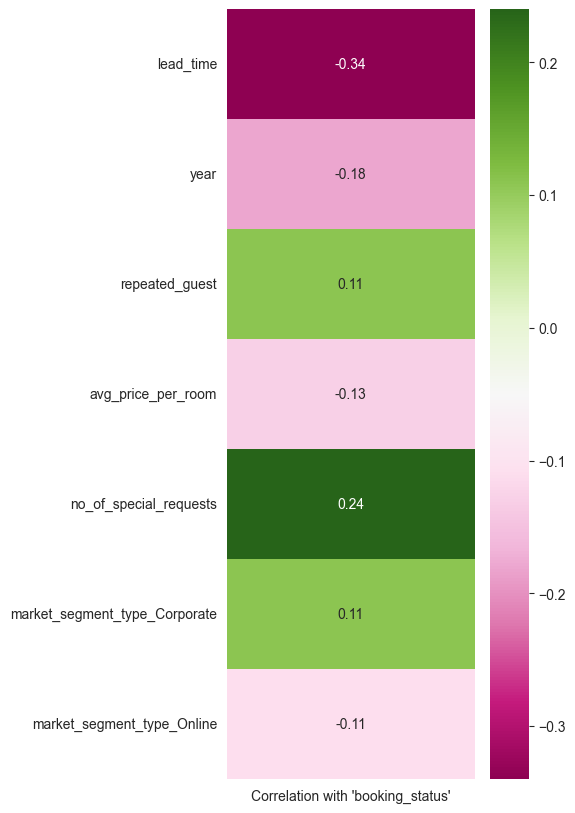

In [90]:
# Use Kendall's correlation since some data is ordinal & not continuous (req. for Pearson)
# TODO: use either Pearson or Kendall depending on categorization of data
correlation = df.loc[:, df.columns != "booking_status"].corrwith(df["booking_status"], method = "kendall", numeric_only = True).round(2)
plt.figure(figsize = (4,10))
sns.heatmap(correlation.to_frame("Correlation with 'booking_status'"), annot = True, cmap = 'PiYG')
plt.show()

#### Principal Component Analysis

As seen with the previous analyses, we have been able to remove a number of different features/dimensions without needing to be worried that we are removing data that is highly correlated with our target feature booking_status. However, the question now remains: are any of these remaining features redundant, and if they are how can we group their effect on the target feature such that we can even further reduce the dimensionality of our data without impacting future predictive accuracy? This begins the phase of the preprocessing/EDA where we can apply PCA and clustering. PCA to reduce our features into a set of key components, and then clustering to discover if there are any strong relationships between our remaining components, especially ones that might affect booking_status.

But before actually launching into the PCA work, we first want to examine the dataset as a whole. By doing so, we hope to gain insight into the distribution of data across our features, which may inform our later normalization. If the data is significantly skewed, for instance, we may want to perform log scaling or sample clipping on certain features prior to computing a minMax normalization of the data.

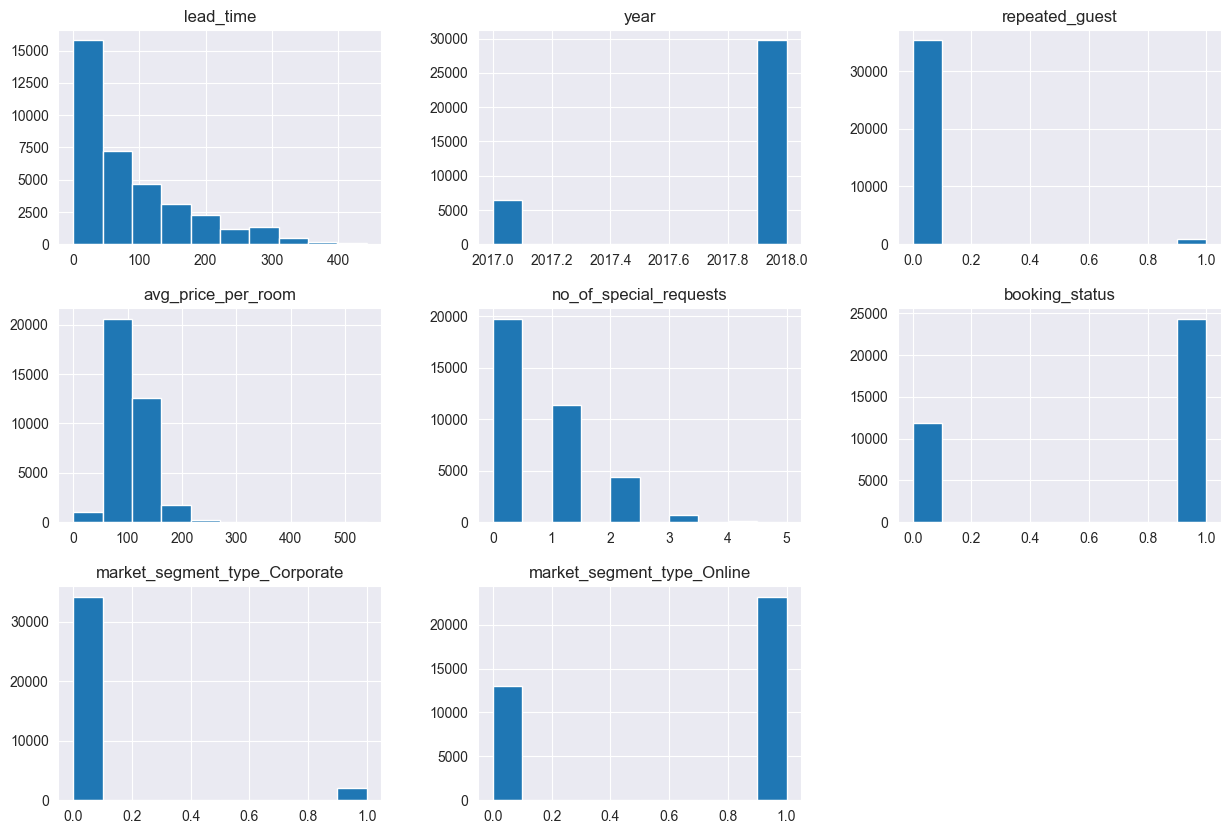

In [91]:
df.hist(figsize=(15,10))
plt.show()

Mercifully, the data does not show a significant skew or contain any egregious outliers that would impact our minmax scaling process. There are some interesting aspects of the data to comment on, however, such as the average room price being distributed very normally as compared to the lead time and number of special requests, which we might not expected. Rather we might have thought all of those natural distributions would be normal, but the others clearly center towards 0 and have a tail following them.
At any rate this should not impact our scaler, and as such we can continue straight ahead into the normalization. We can also take the oppertunity to convert our dataset into all half-percision floats, which are highly optimized for by most GPU drivers that focus around AI/ML/DL.

In [110]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df_normalized.astype("float32", copy=False).dtypes # Move to half-precision floats for speed

lead_time                        float32
year                             float32
repeated_guest                   float32
avg_price_per_room               float32
no_of_special_requests           float32
booking_status                   float32
market_segment_type_Corporate    float32
market_segment_type_Online       float32
dtype: object

While that our data is normalized, we cannot simply blindly jump into running a PCA and attempting to fit it to the data. First, we must identify the structure of our data, which will allow us to determine if a linear or non-linear PCA is more appropriate. That is to say, we need to determine if a linear(non-kernel) PCA would even be able to adequately separate out the data into distinct components, or if a more complex modeling agent will be required.

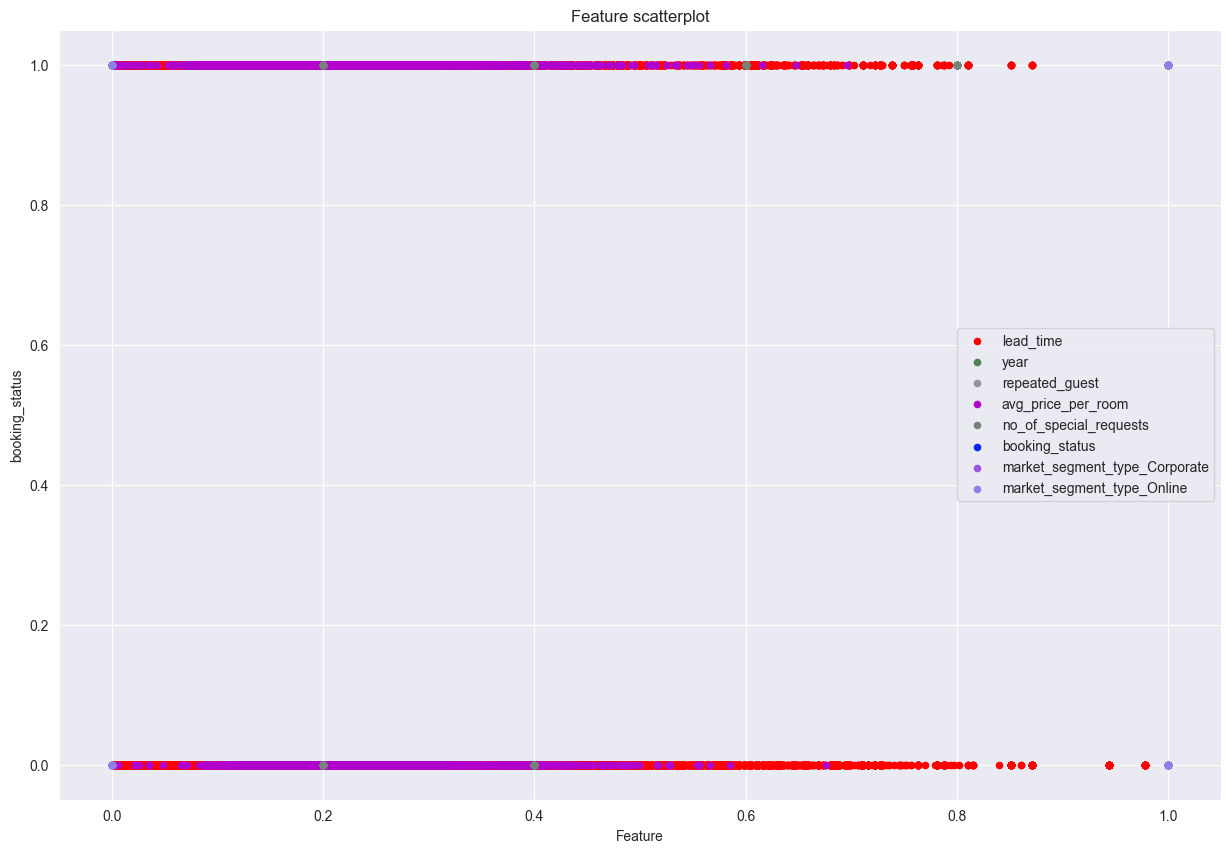

In [199]:
import random

axis = df_normalized.plot.scatter(x="lead_time", y="booking_status", label="lead_time", color="r", figsize=(15,10))

for column in df_normalized.columns[1:]:
    color = (random.random(), random.random(), random.random())
    df_normalized.plot.scatter(x=column, y="booking_status", label=column, color=color, ax=axis)
axis.set_xlabel("Feature")
axis.set_title("Feature scatterplot")
plt.show()

df_target = pd.DataFrame()["target"] = df_normalized["booking_status"]
df_normalized.drop("booking_status", axis=1, inplace=True)

Based on the graph above, the data repersents a relationship where each classification of data can be seperated with a straight line, meaning a linear PCA-based decomposition should be able to accurately seperate the data. Combined with our data now being normalized, we need to identify the number of components we should be reducing our data to, so that we have as few dimensions as possible to handle while still being able to explain as much of our data's variance as possible. To do this, we will generate several normal PCAs and compare the resulting eigenvalues against the Kaiser rule to determine the ideal set of components for later analysis and clustering.

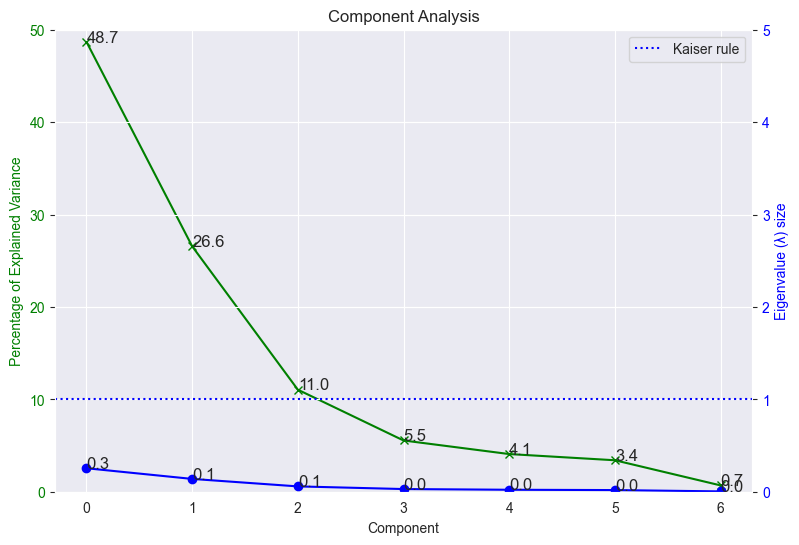

Amount of variance explained by all components s.t. λ_component > 1: 0%


In [200]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=df_normalized.shape[1], svd_solver="full")
pca_results = pca.fit_transform(df_normalized)

color_var = "#008000"
color_eig = "#0000FF"
cutoff = 1
fig, ax_var = plt.subplots(figsize=(9,6))
ax_eig = ax_var.twinx()
ax_var.set_xlabel("Component")
ax_var.set_title("Component Analysis")
ax_var.set_ylim(0, 50)
ax_eig.set_ylim(0, 5)

ax_var.plot(pca.explained_variance_ratio_ * 100, marker="x", color=color_var)
ax_var.set_ylabel('Percentage of Explained Variance', color=color_var)
ax_var.tick_params(axis="y", labelcolor=color_var)

ax_eig.plot(pca.explained_variance_, marker="o", color=color_eig)
ax_eig.set_ylabel("Eigenvalue (λ) size", color=color_eig)
ax_eig.tick_params(axis="y", labelcolor=color_eig)
ax_eig.axhline(y=cutoff, linestyle=":", label="Kaiser rule", color=color_eig)

intersection = np.argwhere(np.diff(np.sign(cutoff - pca.explained_variance_))).flatten()
if len(intersection) == 0:
    num_components = len(pca.explained_variance_)
else:
    num_components = intersection[0] - 1
    ax_eig.axvline(x=num_components, linestyle="dashed", label="Component %d" %(num_components + 1), color="red")
sum = 0
for index in range(num_components):
    if(len(intersection) > 0):
        sum = sum + (pca.explained_variance_ratio_[index] * 100).round(1)
    ax_var.text(index, pca.explained_variance_ratio_[index] * 100, (pca.explained_variance_ratio_[index] * 100).round(1), size=12)
    ax_eig.text(index, pca.explained_variance_[index], pca.explained_variance_[index].round(1), size=12)
    
ax_eig.legend(loc="upper right")
plt.show()
print("Amount of variance explained by all components s.t. λ_component > 1: " + str(sum) + "%")

As our overall variance in the dataset ends up being pretty low (which can be deteremiend from the lack of correlating features), we get a graph where none of our principal components meet the "kaiser rule" rule-of-thumb that is used within factor analysis. The kaiser rule being used to help explain the usefulness of a variable: a value under 1.0 for its eigenvalue typically means it describes less than a single variable. While this may constitute an unstable relationship between the components and the target result, we can see that in the given dataset we can still explain the majority (86.3%) of our data's variance within 3 components, and the vast majority (99.3%) within 6 components. This may make for potentially unreliable clustering results, but K-Means can be applied nonetheless to see if any interesting relationships between components can be drawn.

#### Clustering

With the initial run of PCA complete and fitted to the data, we can now take its results and attempt to interpret them in the form of clustering. Clustering the components will give us an insight into how the components are related to one another, which may or may not provide stronger boundaries than the original components were able to on their own. However, to do this we must first determine the number of clusters to use, since the ubiquitous K-Means clustering algorithm will be utilized. Accomplishing this can be done in an automated fashion (such as with algorithms like DBSCAN), through the utilization of WCSS and something called the elbow method.

WCSS, or the within-cluster sum of square is a method that will take the sum of squared distances between point and its centroid within a random grouping of points. As we expand the number of clusters, this value will naturally trend towards 0, and inside of each change in the number of clusters we will be able to observe the delta between them. Eventually this will taper off as the correct number of groups are found, resulting in a wedge at the point where the true number of groups is likely to be found.

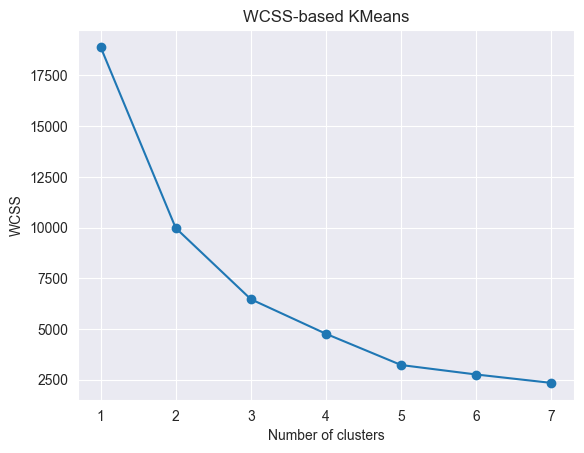

Estimated group count: 2


In [201]:
# Aside from the visualization code, this WCSS implementation is repurposed from
# my old intro to algorithm's project on deep sparse filtering -Bryce
# See https://medium.com/@bshurts/757a829f94fd
from sklearn.cluster import KMeans

wcss = []
for i in range(1, len(pca.components_) + 1):
    kmeans = KMeans(i, n_init=5)
    kmeans.fit(pca_results)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, len(pca.components_) + 1), wcss, marker="o", linestyle="-")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("WCSS-based KMeans")
plt.show()
    
deltas = np.diff(wcss)
delta_prime = np.diff(deltas)
num_group_est = (np.where(delta_prime == max(delta_prime))[0][0]) + 1
print("Estimated group count: " + str(num_community_est))

We end up only finding 2 groups, or clusters, which is promising: if they are tightly related there is a fair chance that they may be able to explain the relationship between the booking_status (which the clusters are hopefully determined around, give our previous work) and the sets of components. Of course, we still have too many dimensions to visualize outright, but we can take a slice of the components and graph the results in a 3D scatterplot against the groups that the clustering algorithm found.

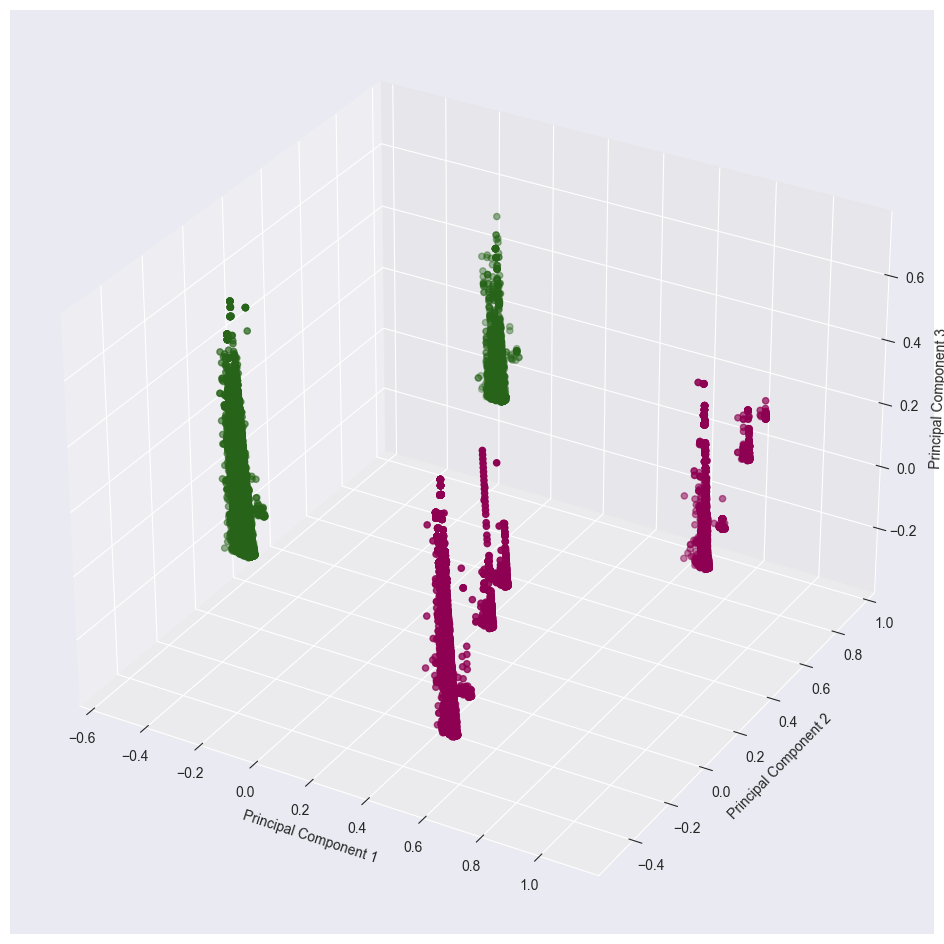

In [205]:
kmeans = KMeans(num_group_est, n_init=100)
kmeans.fit(pca_results)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection="3d")
ax.scatter(pca_results[:,0], pca_results[:,1], pca_results[:,3], c=cluster, cmap="PiYG")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.show()

Viola! We have 2 distinct clusters of components that can be mapped against the booking_status they repersent, and appear to have a clear seperation along the X (component 1) axis. From this point on, we would be able to apply a classifcation agent of choice and begin examining the results for areas in which we might improve (for instance, perhaps it overweights or underweights certain features when classifying). This could result in changes to a number of processes, such as keeping a different set of features, trying a different number of components or clusters, or attempting to use a density-based clustering algorithm (like DBSCAN) instead of the prototype-based K-Means.

# Uniform Manifold Approximation

In [ ]:
import umap
import umap.plot
import pandas as pd
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=class_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=class_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  c=class_color, s=100)
    plt.title(title, fontsize=18)

df = pd.read_csv("Hotel Reservations.csv")
df.head()

# drop booking id
df.drop('Booking_ID', axis=1, inplace=True)

# define maps for string variables
map1 = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2}
map2 = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6 }
map3 = {'Offline':0, 'Online':1, 'Corporate':2, 'Aviation':3, 'Complementary':4}
map4 = {'Not_Canceled':0, 'Canceled':1}

# convert strings to integers
df.type_of_meal_plan = df.type_of_meal_plan.map(map1)
df.room_type_reserved = df.room_type_reserved.map(map2)
df.market_segment_type = df.market_segment_type.map(map3)
df.booking_status = df.booking_status.map(map4)

# drop any NaN's (should be none, but just in case)
df = df.dropna()
df.head()

# get columns for scaling
df_data = df[
    [

        "required_car_parking_space", "room_type_reserved", "lead_time", 
         "market_segment_type","repeated_guest", "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", "no_of_special_requests", "booking_status",
        
    ]
].values

# shift mean to center and scale by std deviation
scaled_df_data = StandardScaler().fit_transform(df_data)

# init UMAP
reducer = umap.UMAP(
n_neighbors=15, min_dist=0.1, n_components=3, metric='euclidean'
)

# fit data
embedding = reducer.fit_transform(scaled_df_data)

# draw scatter plot (not too useful as this data doesn't seperate as nicely as things like measured lenghts of objects)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.booking_status])
plt.gca().set_aspect('equal', 'datalim')
plt.title('2D UMAP projection of the Hotel dataset', fontsize=24);

# draw umap for various neighbor sizes
data = scaled_df_data
# assign each booking status a color used for 3d plot
class_color = [sns.color_palette()[x] for x in df.booking_status]

# draw umap in 3 dimensions
draw_umap(n_components=3, title='3D UMAP projection of the Hotel dataset')


# References
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# https://umap-learn.readthedocs.io/en/latest/plotting.html

# Also useful link
# https://scikit-learn.org/stable/tutorial/index.html


# Varying UMAP min_dist

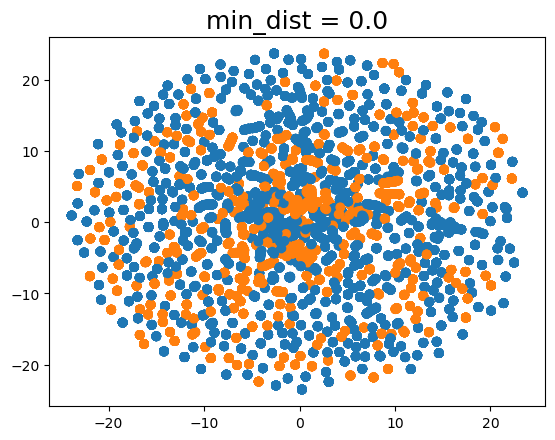

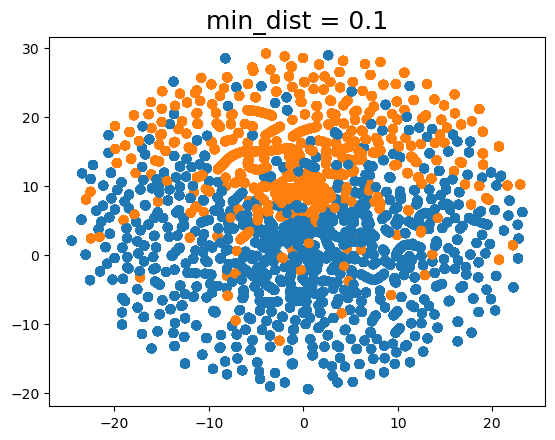

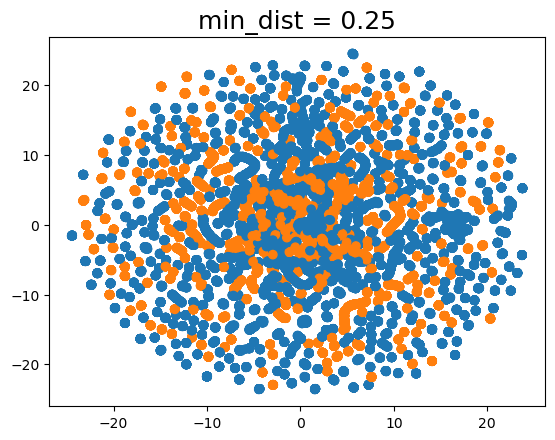

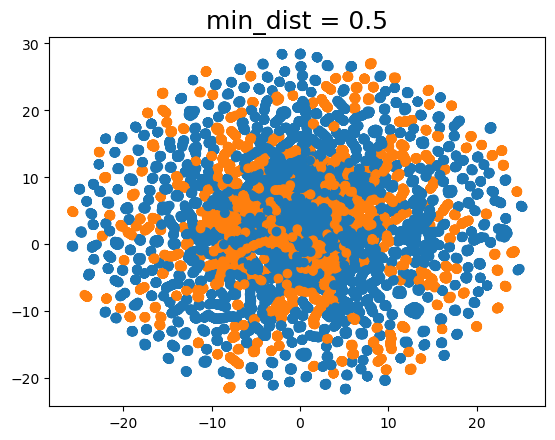

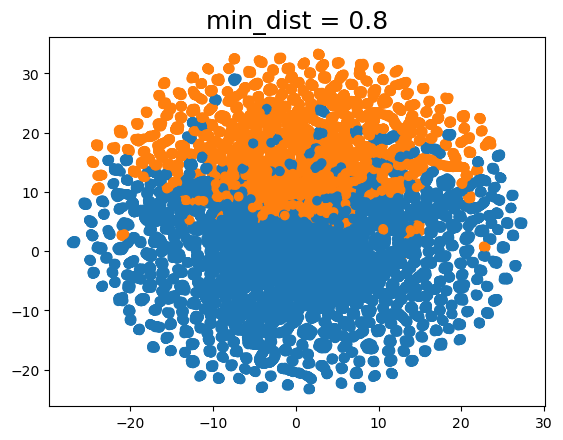

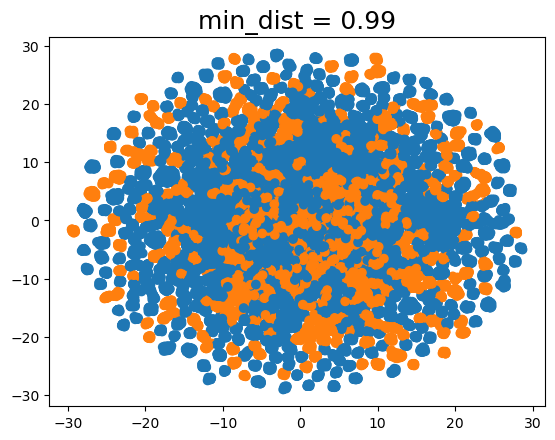

In [2]:
import umap
import umap.plot
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.preprocessing import StandardScaler


def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=class_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=class_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  c=class_color, s=100)
    plt.title(title, fontsize=18)

df = pd.read_csv("Hotel Reservations.csv")
df.head()

# drop booking id
df.drop('Booking_ID', axis=1, inplace=True)

# define maps for string variables
map1 = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2}
map2 = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6 }
map3 = {'Offline':0, 'Online':1, 'Corporate':2, 'Aviation':3, 'Complementary':4}
map4 = {'Not_Canceled':0, 'Canceled':1}

# convert strings to integers
df.type_of_meal_plan = df.type_of_meal_plan.map(map1)
df.room_type_reserved = df.room_type_reserved.map(map2)
df.market_segment_type = df.market_segment_type.map(map3)
df.booking_status = df.booking_status.map(map4)

# drop any NaN's (should be none, but just in case)
df = df.dropna()
df.head()

# get columns for scaling
df_data = df[
    [

        "required_car_parking_space", "room_type_reserved", "lead_time", 
         "market_segment_type","repeated_guest", "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", "no_of_special_requests", "booking_status",
        
    ]
].values

# shift mean to center and scale by std deviation
scaled_df_data = StandardScaler().fit_transform(df_data)

# draw umap for various neighbor sizes
data = scaled_df_data
# assign each booking status a color used for 3d plot
class_color = [sns.color_palette()[x] for x in df.booking_status]

# draw umap for various min_dist
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))


# References
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# https://umap-learn.readthedocs.io/en/latest/plotting.html

# Also useful link
# https://scikit-learn.org/stable/tutorial/index.html

# UMAP Results
From the projections you can see clustering on the top side of the 3d projection as well as on the top side of the 2D projection showing clearing defined clustering of cancelled and honored reservations. The min_dist of 0.8 does a better job of creating spatial seperation of the two classes when compared to the other parameters. This dimension reduction technique does a good job of taking into consideration the geometry of the features in addition to their relative distances and I think it can be useful in many applications depending on the dataset.
